<a href="https://www.kaggle.com/code/vtrackstar/ctnf-test-data?scriptVersionId=211236315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ctfdata/Colgate Test Data - Sheet1.csv
/kaggle/input/updstedctf/Colgate Test Data - Sheet1 (1).csv


In [2]:
testing = pd.read_csv('/kaggle/input/updstedctf/Colgate Test Data - Sheet1 (1).csv')
testing.head()

,Name,Gender,Broad Jump (9/30),BJ (9/30) in meters,Broad Jump (10/29),BJ (10/29) in meters,Average of Broad Jump (in meters),5 Bound Test (9/23),5BT (9/23) in meters,5 Bound Test (9/30),5BT (9/30) in meters,5 Bound Test (10/29),5BT (10/29) in meters,Average of 5 Bound Test (in meters),OH Med Ball Toss (9/30),OHMBT (9/30) in meters,OH Med Ball Toss (10/29),OHMBT (10/29) in meters,Average of OH Med Ball Toss (in meters),Vert Jump (9/25),VJ (9/25) in meters,Vert Jump (9/30?),VJ (9/30?) in meters,Vert Jump (10/23),VJ (10/23) in meters,Vert Jump (10/29),VJ (10/29) in meters,Average of Vert Jump (in meters),Fly 30M (10/2),Fly 30M (10/30),Average of Fly 30M (in seconds),30M (10/2),30M (10/17),30M (10/30),Average of 30M (in seconds),60M (10/30),45 Second Test (10/4),45 Second Test (10/30),Average of 45 Second Test (in meters)
0,Ryan,M,"6'3""",1.9050,NaN,NaN,1.9050,"30'2""",9.1948,"30'5""",9.2710,NaN,NaN,9.232900,"23'0""",7.0104,NaN,NaN,7.0104,"0'16.5""",0.41910,"0'16.9""",0.42926,NaN,NaN,NaN,NaN,0.424180,4.12,NaN,4.12,4.96,NaN,NaN,4.960000,NaN,285.0,NaN,285.0
1,Josh,M,"9'1""",2.7686,NaN,NaN,2.7686,"39'9""",12.1158,"38'6""",11.7348,NaN,NaN,11.925300,"18'0""",5.4864,NaN,NaN,5.4864,"0'28.9""",0.73406,"0'28.9""",0.73406,NaN,NaN,NaN,NaN,0.734060,3.13,NaN,3.13,3.88,NaN,NaN,3.880000,NaN,368.0,NaN,368.0
2,Sonja,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"32'5""",9.8806,NaN,NaN,9.880600,NaN,NaN,NaN,NaN,NaN,"0'24""",0.60960,"0'21.3""",0.54102,"0'18.9""",0.48006,NaN,NaN,0.543560,NaN,NaN,NaN,NaN,4.75,4.77,4.760000,NaN,NaN,NaN,NaN
3,Will T.,M,"9'2.5""",2.8067,NaN,NaN,2.8067,"41'2""",12.5476,"37'1""",11.3030,NaN,NaN,11.925300,"33'11""",10.3378,NaN,NaN,10.3378,"0'28.8""",0.73152,"0'28.8""",0.73152,"0'27.2""",0.69088,NaN,NaN,0.717973,3.22,3.26,3.24,4.01,4.08,4.07,4.053333,7.49,355.0,355.0,355.0
4,Katie,F,"6'4""",1.9304,"6'9""",2.0574,1.9939,"27'10""",8.4836,"28'0""",8.5344,"28'0""",8.5344,8.517467,"27'0""",8.2296,"26'6""",8.0772,8.1534,NaN,NaN,NaN,NaN,NaN,NaN,"0'16.9""",0.42926,0.429260,4.34,4.20,4.27,5.24,4.90,5.11,5.083333,9.86,280.0,275.0,277.5


In [3]:
testing.columns

Index(['Name', 'Gender', 'Broad Jump (9/30)', 'BJ (9/30) in meters',
       'Broad Jump (10/29)', 'BJ (10/29) in meters',
       'Average of Broad Jump (in meters)', '5 Bound Test (9/23)',
       '5BT (9/23) in meters', '5 Bound Test (9/30)', '5BT (9/30) in meters',
       '5 Bound Test (10/29)', '5BT (10/29) in meters',
       'Average of 5 Bound Test (in meters)', 'OH Med Ball Toss (9/30)',
       'OHMBT (9/30) in meters', 'OH Med Ball Toss (10/29)',
       'OHMBT (10/29) in meters', 'Average of OH Med Ball Toss (in meters)',
       'Vert  Jump (9/25)', 'VJ (9/25) in meters', 'Vert Jump (9/30?)',
       'VJ (9/30?) in meters', 'Vert Jump (10/23)', 'VJ (10/23) in meters',
       'Vert Jump (10/29)', 'VJ (10/29) in meters',
       'Average of Vert Jump (in meters)', 'Fly 30M (10/2)', 'Fly 30M (10/30)',
       'Average of Fly 30M (in seconds)', '30M (10/2)', '30M (10/17)',
       '30M (10/30)', 'Average of 30M (in seconds)', '60M (10/30)',
       '45 Second Test (10/4)', '45 Second Test

In [4]:
correlation_matrix = testing[['Average of Broad Jump (in meters)', 
                              'Average of 5 Bound Test (in meters)', 
                              'Average of OH Med Ball Toss (in meters)', 
                              'Average of Vert Jump (in meters)', 
                              'Average of Fly 30M (in seconds)', 
                              'Average of 30M (in seconds)', 
                              '60M (10/30)',
                              'Average of 45 Second Test (in meters)']].corr()

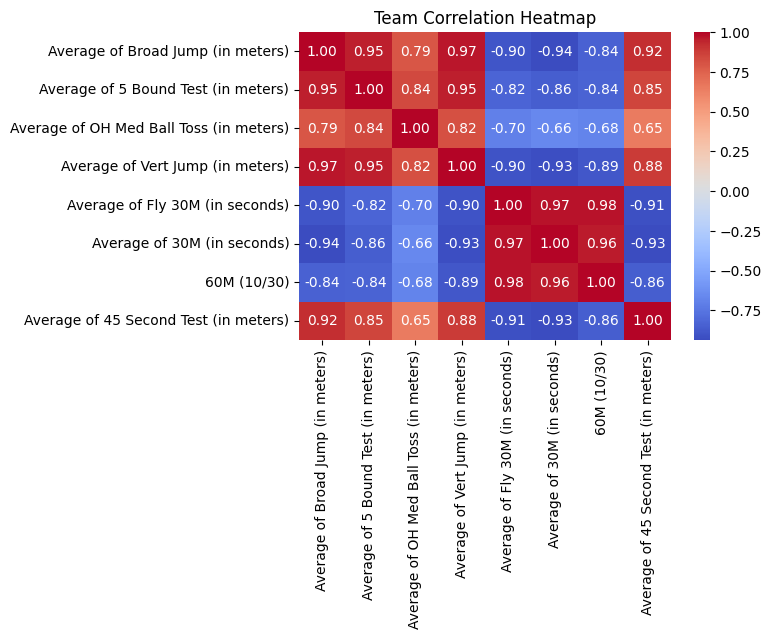

In [5]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Team Correlation Heatmap")
plt.show()

In [6]:
mens = testing[testing['Gender'] == 'M']
mens[['Name', 'Average of Broad Jump (in meters)', 
      'Average of 5 Bound Test (in meters)', 
      'Average of OH Med Ball Toss (in meters)',
      'Average of Vert Jump (in meters)', 
      'Average of Fly 30M (in seconds)', 
      'Average of 30M (in seconds)', 
      '60M (10/30)', 
      'Average of 45 Second Test (in meters)']]

,Name,Average of Broad Jump (in meters),Average of 5 Bound Test (in meters),Average of OH Med Ball Toss (in meters),Average of Vert Jump (in meters),Average of Fly 30M (in seconds),Average of 30M (in seconds),60M (10/30),Average of 45 Second Test (in meters)
0,Ryan,1.90500,9.232900,7.0104,0.424180,4.120,4.960000,NaN,285.0
1,Josh,2.76860,11.925300,5.4864,0.734060,3.130,3.880000,NaN,368.0
3,Will T.,2.80670,11.925300,10.3378,0.717973,3.240,4.053333,7.49,355.0
6,Will A.,2.20980,9.516533,5.7150,0.495300,3.815,4.596667,8.69,290.0
13,Colin,2.64160,11.938000,9.2329,0.664845,3.210,4.110000,7.34,350.0
14,Ethan,2.67970,11.252200,11.0998,0.680720,2.955,4.033333,NaN,362.5
16,Marcus,2.84480,12.911667,8.5725,0.759460,3.155,3.913333,7.08,365.0
17,Arison,2.67970,11.870267,9.9060,0.764540,3.155,3.946667,7.12,349.0
18,John,2.81940,12.793133,9.8679,0.745067,3.310,4.206667,7.31,348.5
19,Kwadjo,2.84480,12.454467,10.7569,0.829310,3.015,4.070000,7.07,345.0


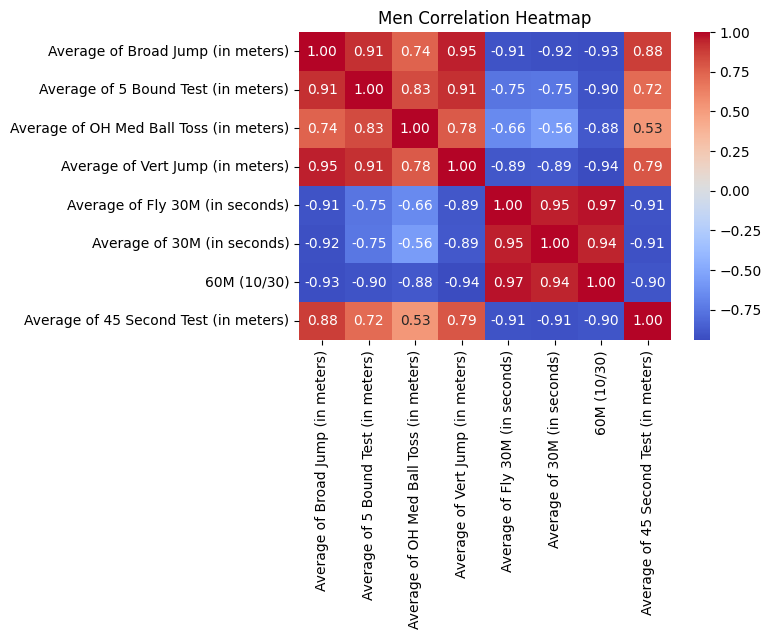

In [7]:
mcorr_matrix = mens[['Average of Broad Jump (in meters)', 
                              'Average of 5 Bound Test (in meters)', 
                              'Average of OH Med Ball Toss (in meters)', 
                              'Average of Vert Jump (in meters)', 
                              'Average of Fly 30M (in seconds)', 
                              'Average of 30M (in seconds)', 
                              '60M (10/30)',
                              'Average of 45 Second Test (in meters)']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(mcorr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Men Correlation Heatmap")
plt.show()

In [8]:
womens = testing[testing['Gender'] == 'F']
womens[['Name', 'Average of Broad Jump (in meters)', 
      'Average of 5 Bound Test (in meters)', 
      'Average of OH Med Ball Toss (in meters)',
      'Average of Vert Jump (in meters)', 
      'Average of Fly 30M (in seconds)', 
      'Average of 30M (in seconds)', 
      '60M (10/30)', 
      'Average of 45 Second Test (in meters)']]

,Name,Average of Broad Jump (in meters),Average of 5 Bound Test (in meters),Average of OH Med Ball Toss (in meters),Average of Vert Jump (in meters),Average of Fly 30M (in seconds),Average of 30M (in seconds),60M (10/30),Average of 45 Second Test (in meters)
2,Sonja,NaN,9.880600,NaN,0.543560,NaN,4.760000,NaN,NaN
4,Katie,1.9939,8.517467,8.1534,0.429260,4.270,5.083333,9.86,277.5
5,June,2.1590,8.991600,6.7691,0.496570,3.815,4.666667,8.42,303.0
7,Mia,2.1590,9.194800,6.8326,0.514350,3.750,4.695000,8.39,290.0
8,Oonagh,2.0828,9.846733,6.7818,0.530860,3.600,4.523333,7.78,292.5
9,Ini,2.2606,10.388600,NaN,0.571500,4.020,4.750000,8.89,310.0
10,Liz,2.2225,9.186333,8.5090,0.565785,3.510,4.410000,7.95,304.0
11,Sara,2.2606,9.652000,6.7310,0.576580,3.480,4.460000,7.89,325.0
12,Clare,2.2606,10.303933,8.8646,0.578485,3.335,4.383333,7.81,323.5
15,Kiran,2.5781,10.778067,9.0932,0.674370,3.480,4.296667,7.69,314.5


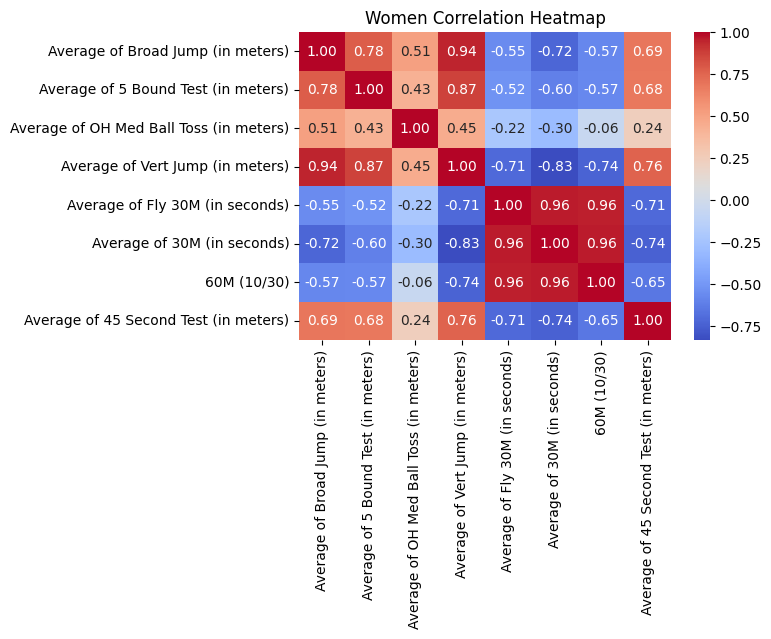

In [9]:
wcorr_matrix = womens[['Average of Broad Jump (in meters)', 
                              'Average of 5 Bound Test (in meters)', 
                              'Average of OH Med Ball Toss (in meters)', 
                              'Average of Vert Jump (in meters)', 
                              'Average of Fly 30M (in seconds)', 
                              'Average of 30M (in seconds)', 
                              '60M (10/30)',
                              'Average of 45 Second Test (in meters)']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(wcorr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Women Correlation Heatmap")
plt.show()

In [10]:
testing[['Average of Broad Jump (in meters)', 
         'Average of 5 Bound Test (in meters)', 
         'Average of OH Med Ball Toss (in meters)', 
         'Average of Vert Jump (in meters)', 
         'Average of Fly 30M (in seconds)', 
         'Average of 30M (in seconds)', 
         '60M (10/30)',
         'Average of 45 Second Test (in meters)']] = testing[['Average of Broad Jump (in meters)', 
                              'Average of 5 Bound Test (in meters)', 
                              'Average of OH Med Ball Toss (in meters)', 
                              'Average of Vert Jump (in meters)', 
                              'Average of Fly 30M (in seconds)', 
                              'Average of 30M (in seconds)', 
                              '60M (10/30)',
                              'Average of 45 Second Test (in meters)']].fillna(testing[['Average of Broad Jump (in meters)', 
                              'Average of 5 Bound Test (in meters)', 
                              'Average of OH Med Ball Toss (in meters)', 
                              'Average of Vert Jump (in meters)', 
                              'Average of Fly 30M (in seconds)', 
                              'Average of 30M (in seconds)', 
                              '60M (10/30)',
                              'Average of 45 Second Test (in meters)']].mean())

X = testing[['Average of Broad Jump (in meters)', 
                              'Average of 5 Bound Test (in meters)', 
                              'Average of OH Med Ball Toss (in meters)', 
                              'Average of Vert Jump (in meters)', 
                              'Average of 30M (in seconds)', '60M (10/30)',
                              'Average of 45 Second Test (in meters)']]
y = testing[['Average of Fly 30M (in seconds)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.029146449580668764
R^2 Score: 0.8183621022458096


In [13]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression Equation: y = {slope}x + {intercept}")

Regression Equation: y = [ 0.19684424  0.07115657 -0.03520075 -1.07063248  0.20328498  0.10344476
 -0.00714225]x + [3.78530356]


Fly 30M Time = (Broad Jump (in meters) x 0.19684424) + (5 Bound Test (in meters) x 0.07115657) - (Average of OH Med Ball Toss (in meters) x 0.03520075) - (Vert Jump (in meters) x 1.07063248) + (30M (in seconds) x 0.20328498 + (60M (in seconds) x 0.10344476) - (45 Second Test (in meters) x 0.00714225) + 3.78530356